In [ ]:
###########Importing necessary packages
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
!pip install detecta
from detecta import detect_peaks
import matplotlib.pyplot as plt 
import matplotlib.dates
from datetime import datetime
from matplotlib.pyplot import figure

In [ ]:
#### Importing the quotes originally extracted from TAQ database
a=pd.read_csv('final_quotes.csv')

C:\Users\KOUSHANI\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
print(a)

                   Timestamp Symbol  Bid_Price  Bid_Size  Offer_Price  \
0        01/07/2020 10:00:00   AAPL     298.81       1.0       298.91   
1        01/07/2020 10:00:01   AAPL     298.91       3.0       299.03   
2        01/07/2020 10:00:02   AAPL     298.85       1.0       299.04   
3        01/07/2020 10:00:03   AAPL     298.82       1.0       299.01   
4        01/07/2020 10:00:04   AAPL     298.92       1.0       299.03   
...                      ...    ...        ...       ...          ...   
1048570                  NaN    NaN        NaN       NaN          NaN   
1048571                  NaN    NaN        NaN       NaN          NaN   
1048572                  NaN    NaN        NaN       NaN          NaN   
1048573                  NaN    NaN        NaN       NaN          NaN   
1048574                  NaN    NaN        NaN       NaN          NaN   

         Offer_Size  Best_Bid_Price  Best_Bid_Size  Best_Offer_Price  \
0               1.0          298.81            1.0 

Visualizing the AAPL bid/ask quotes for 1/7/2020 from 10AM to 5PM


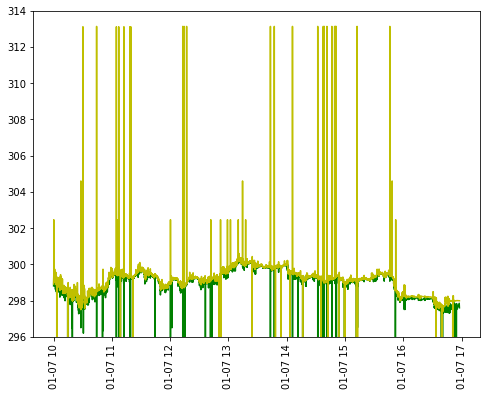

In [ ]:
df = pd.DataFrame(a, columns = ['Timestamp','Bid_Size','Bid_Price','Offer_Size','Ask_Price','Offer_Price'])

#dates = matplotlib.dates.date2num(df['Time_stamp'])
df['Timestamp']= pd.to_datetime(df['Timestamp'])
date = df["Timestamp"]
value = df["Bid_Size"]
price=df["Bid_Price"]
price_ask=df["Offer_Price"]
price_Ask=df["Ask_Price"]
figure(figsize=(8, 6))
plt.ylim(296, 314)
plt.xticks(rotation=90)
plt.plot(date,price,'g',date,price_ask,'y')

Visualizing the Volume of Quotes for AAPL on 1/7/2020  10 AM to 4PM

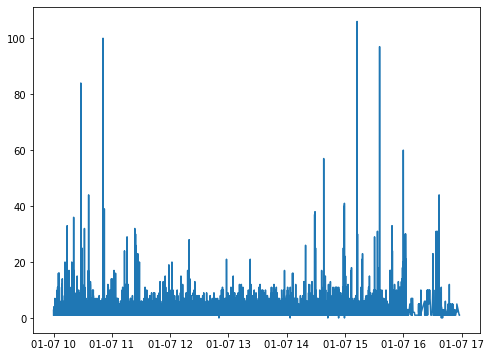

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(date, value)

Doing a differencing (t+1) - t th timepoint to observe trends/peaks in data - Identify outliers (Influential/Non Influential points) on the Bid Size 

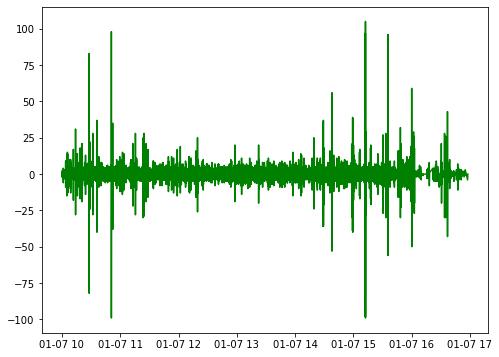

In [ ]:
### Using a diff() function below on the entire Bid Size Column
df['diff_bid_size'] = df['Bid_Size'].diff()
date1 = df["Timestamp"]
value_diff = df["diff_bid_size"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(date1, value_diff,'g' )

Doing a differencing (t+1) - t th timepoint to observe trends/peaks in data - Identify outliers (Influential/Non Influential points) on the Ask Size

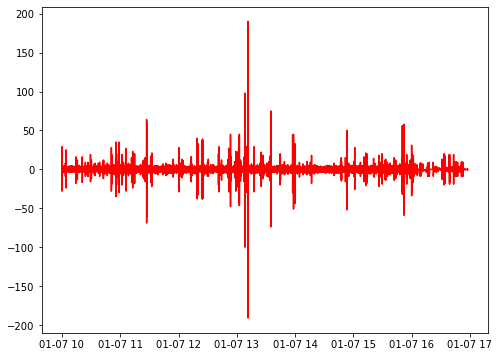

In [ ]:
### Using a diff function below
df['diff_ask_size'] = df['Offer_Size'].diff()
date1 = df["Timestamp"]
value_diff = df["diff_ask_size"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(date1, value_diff_ask,'r' )

Plotting both Bid/Ask Volume differences in single graph

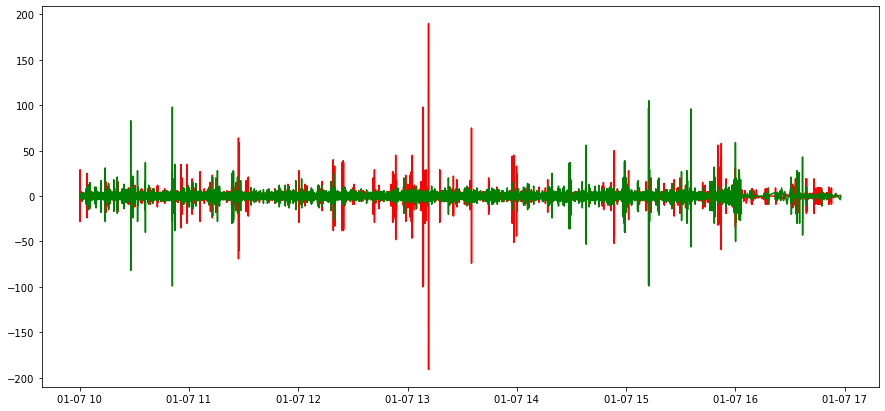

In [ ]:
df['diff_ask_size'] = df['Offer_Size'].diff()
date1 = df["Timestamp"]
value_diff_ask = df["diff_ask_size"]
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(date1, value_diff_ask,'r',date1,value_diff,'g')

Plotting both Bid/Ask Price differences in one single plot. This plot below helps to identify points that show sudden drop/rise in the prices

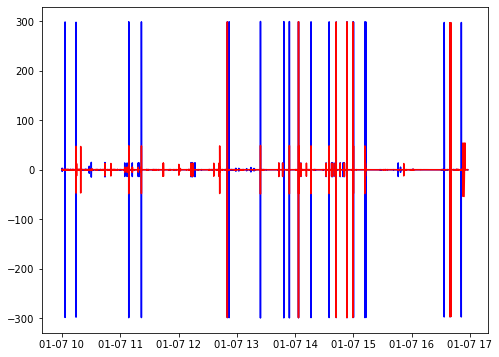

In [ ]:
df['diff_ask_price'] = df['Offer_Price'].diff()
date1 = df["Timestamp"]
value_diff_ask_price = df["diff_ask_price"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(date1, value_diff_ask_price,'b' ,date1, value_diff_bid_price,'r' )